<a href="https://colab.research.google.com/github/eya-methnani/test/blob/master/SMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#(SMC Challenge) Understanding Student Well-being:

The task involves undertaking a project that centers on gathering data, conducting data analysis, and delivering actionable recommendations to enhance the well-being of students.










***GOALS:***

*  Thorough Data Analysis: Analyze collected student data, examining social relationships, physical and mental health, and emotional resilience.
*  Uncover Insights: Discover new insights into the intricate interactions among these aspects, gaining a deeper understanding of their impact on academic success and personal development.
*  Improve Well-Being: Utilize acquired insights to inform strategies for enhancing student well-being and resilience.
*  Academic Impact: Investigate how social, health, and emotional factors influence students' academic achievements, identifying potential areas for intervention and support.





**COLLECT DATA**
> We did a survey to get information. The survey asked questions about different parts of life, like how we think, our bodies, and our friends, to see how we feel overall.



In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Packages and Libraries

In [29]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Data Loading and Preprocessing

**DATA DESCRIPTION**

In [44]:
#Loading Our Dataset
data = pd.read_csv("/content/drive/MyDrive/smc/students.csv")
#Removing Horodateur and Email Adress
data = data.drop(["Horodateur", "Adresse e-mail"], axis = 1)
print("Data Shape : ", data.shape)
data.head()

Data Shape :  (217, 26)


,How would you rate your overall mental well-being?,How often do you feel stressed on a typical week?,How frequent have you experienced feelings of excessive worry or anxiety in the past month?,Over the past month how frequent have you experienced a persistent low mood or a lack of interest in activities you usually enjoy?\n,How would you rate your self-esteem and confidence in your abilities?,How would you rate your overall physical health?,Do you have any existing medical conditions that you think may impact your physical health?,How many times do you exercise with moderate to high intensity in a week?,"On average, how many hours of sleep do you get per night?",Have you noticed any changes in your sleep patterns that may be related to your mood?,...,How satisfied are you with your current social life?,How often do you participate in group activities or gatherings?,"In challenging times, how comfortable do you feel seeking support from your peers?",Have you experienced any feelings of loneliness or isolation recently?,Are you a member of any clubs or organizations within your school or community?,How would you rate how involvement in such groups influenced your social connections?,How would you describe your relationship with your family members?,Do you feel that family dynamics impact your social life?,How would you rate your academic results?,How mcuh do you feel comfortable in your school
0,5,5,Sometimes,Often,Normal,4,No,3,7-9,No,...,4,Sometimes,Not comfortable,Yes,No,Normal,Very good,Yes,4,5
1,9,4,Always,Occasionally,Quiet high,7,No,1,7-9,Yes,...,4,Sometimes,Normal,Yes,Yes,Normal,Good,Yes,3,2
2,7,3,Often,Often,Normal,5,Yes,3,4-6,Yes,...,6,Sometimes,Normal,Yes,Yes,Good,Good,Yes,3,2
3,10,1,Sometimes,Never,Quiet high,9,No,1,7-9,No,...,7,Always,Comfortable,No,Yes,Very good,Good,No,4,4
4,7,4,Occasionally,Often,Quiet high,4,Yes,2,7-9,Yes,...,4,Sometimes,Not comfortable,Yes,Yes,Good,Good,Yes,5,3


**How would you rate your overall mental well-being?**

*Type: Integer*
Description: This feature captures the respondent's self-assessment of their overall mental well-being. It serves as a subjective measure of mental health, potentially influencing academic performance.

**How often do you feel stressed on a typical week?**

*Type: Integer*
Description: This feature quantifies the frequency of stress experienced by respondents in a typical week. Stress levels can impact academic performance, and this information provides insight into the respondents' stress patterns.

**How frequent have you experienced feelings of excessive worry or anxiety in the past month?**

*Type: Object*
Description: This categorical feature indicates the frequency of excessive worry or anxiety in the past month. It provides additional context to understand the mental state of the respondents.

**Over the past month, how frequent have you experienced a persistent low mood or a lack of interest in activities you usually enjoy?**

*Type: Object*
Description: Similar to the previous feature, this one assesses the frequency of low mood or lack of interest. It can offer insights into emotional well-being and potential links to academic engagement.

**How would you rate your self-esteem and confidence in your abilities?**

*Type: Object*
Description: This subjective measure gauges the respondent's self-esteem and confidence. Self-perception can influence academic motivation and success.

**How would you rate your overall physical health?**

*Type: Integer*
Description: This feature provides a self-assessment of overall physical health. Physical well-being can impact cognitive function and, consequently, academic performance.

**Do you have any existing medical conditions that you think may impact your physical health?**

*Type: Object*
Description: A categorical feature indicating the presence of any medical conditions that respondents believe might affect their physical health. It gives insight into potential health-related challenges.

**How many times do you exercise with moderate to high intensity in a week?**

Type: Integer
Description: The frequency of moderate to high-intensity exercise per week is a proxy for physical activity levels, which can contribute to overall well-being and academic performance.

**On average, how many hours of sleep do you get per night?**

Type: Object
Description: Sleep duration is crucial for cognitive function. This feature provides information about the respondents' sleep habits, which can impact academic performance.

**Have you noticed any changes in your sleep patterns that may be related to your mood?**

Type: Object
Description: This categorical feature explores the potential connection between changes in sleep patterns and mood, offering insights into the interplay between mental health and sleep.

**How would you describe your eating habits?**

Type: Object
Description: This feature provides subjective information about respondents' eating habits. Nutritional factors can influence physical and mental well-being, thereby affecting academic outcomes.

**Have you noticed any changes in your appetite that may be related to your mood?**

Type: Object
Description: Similar to sleep, this feature explores the link between changes in appetite and mood, providing additional context for understanding the respondents' mental state.

**How frequently do you engage in substance use (e.g., alcohol, tobacco, recreational drugs)?**

Type: Object
Description: This categorical feature captures the frequency of substance use, which can have implications for both physical and mental health, potentially affecting academic performance.

**How much water do you typically drink in a day?**

Type: Object
Description: Hydration is a fundamental aspect of physical well-being. This feature provides information about respondents' water consumption, contributing to the overall understanding of their health habits.

**Do you notice any physical symptoms (e.g., headaches, muscle tension) when you are stressed?**

Type: Object
Description: This categorical feature explores the association between stress and physical symptoms. It provides insights into the physiological manifestations of stress, which may impact academic performance.

**How would you rate the contribution of your physical health to your overall well-being?**

Type: Integer
Description: This feature assesses the perceived contribution of physical health to overall well-being. It reflects the importance individuals attribute to physical health in the context of their general welfare.

**How satisfied are you with your current social life?**

Type: Integer
Description: Social satisfaction is a subjective measure of the respondents' contentment with their social connections. Social well-being can influence mental health and, consequently, academic performance.

**How often do you participate in group activities or gatherings?**

Type: Object
Description: This categorical feature provides information about the frequency of participation in group activities. Social engagement can contribute to overall well-being and academic success.

**In challenging times, how comfortable do you feel seeking support from your peers?**

Type: Object
Description: This feature gauges the comfort level of seeking support from peers during challenging times, reflecting the importance of social support in coping with stressors.

**Have you experienced any feelings of loneliness or isolation recently?**

Type: Object
Description: Loneliness and isolation are subjective experiences that can impact mental well-being. This feature provides insights into the social and emotional aspects of respondents' lives.

**Are you a member of any clubs or organizations within your school or community?**

Type: Object
Description: This categorical feature indicates whether respondents are part of any clubs or organizations. Involvement in extracurricular activities can influence social connections and overall well-being.

**How would you rate how involvement in such groups influenced your social connections?**

Type: Object
Description: This feature assesses the perceived impact of group involvement on social connections. It provides insights into how extracurricular activities contribute to the respondents' social well-being.

**How would you describe your relationship with your family members?**

Type: Object
Description: This subjective feature captures respondents' descriptions of their relationships with family members. Family dynamics can play a role in both mental health and academic performance.

**Do you feel that family dynamics impact your social life?**

Type: Object
Description: This categorical feature explores the perceived impact of family dynamics on social life. It provides insights into the interconnectedness of family relationships and social well-being.

**How would you rate your academic results?**

Type: Integer
Description: The target variable for prediction, this feature represents the respondents' self-assessment or actual academic results. It serves as the dependent variable that you aim to predict based on the other features.

**How much do you feel comfortable in your school?**

Type: Object
Description: This feature assesses the respondents' comfort level in their school environment. School comfort can influence overall well-being and, subsequently, academic performance.


 **Each of these features provides valuable insights into different aspects of respondents' lives, encompassing mental and physical health, social connections, and academic experiences.**

**DATA PREPROCESSING**

In [6]:
data = data.set_axis([
    'mental',
    'stressed',
    'anxiety',
    'mood',
    'self-esteem',
    "physical",
    "medical",
    "exercise",
    "sleep",
    "sleep_patterns",
    "Eating",
    "appetite",
    "substance",
    "drink_water",
    "physical_symptoms",
    "physical_health",
    "social_life",
    "group_activities",
    "seeking_support",
    "lo_iso_feeling",
    "member","rate _social",
    "relationship_Family",
    "social_impact",
    "Academic_results",
    "comfort_school"
  ], axis='columns')

data.head(5)

,mental,stressed,anxiety,mood,self-esteem,physical,medical,exercise,sleep,sleep_patterns,...,social_life,group_activities,seeking_support,lo_iso_feeling,member,rate _social,relationship_Family,social_impact,Academic_results,comfort_school
0,5,5,Sometimes,Often,Normal,4,No,3,7-9,No,...,4,Sometimes,Not comfortable,Yes,No,Normal,Very good,Yes,4,5
1,9,4,Always,Occasionally,Quiet high,7,No,1,7-9,Yes,...,4,Sometimes,Normal,Yes,Yes,Normal,Good,Yes,3,2
2,7,3,Often,Often,Normal,5,Yes,3,4-6,Yes,...,6,Sometimes,Normal,Yes,Yes,Good,Good,Yes,3,2
3,10,1,Sometimes,Never,Quiet high,9,No,1,7-9,No,...,7,Always,Comfortable,No,Yes,Very good,Good,No,4,4
4,7,4,Occasionally,Often,Quiet high,4,Yes,2,7-9,Yes,...,4,Sometimes,Not comfortable,Yes,Yes,Good,Good,Yes,5,3


**DATA encoding:**
 we employed encoding techniques to construct correlation graphs, aiming to unveil intricate relationships between various features and students' academic results and explored mutual correlations among different features, providing a nuanced understanding of the multifaceted dynamics influencing students' lives.

In [7]:
data["medical"].replace(("Yes","No"),(1,0),inplace=True)
data["sleep"].replace(("4"))
data["sleep_patterns"].replace(("Yes","No"),(1,0),inplace=True)
data["lo_iso_feeling"].replace(("Yes","No"),(1,0),inplace=True)
data["member"].replace(("Yes","No"),(1,0),inplace=True)
data["social_impact"].replace(("Yes","No"),(1,0),inplace=True)
data["appetite"].replace(("Yes","No"),(1,0),inplace=True)
data["physical_symptoms"].replace(("Yes","No"),(1,0),inplace=True)
data["sleep"].replace(("4-6","7-9","10-12"),(0,1,2),inplace=True)
data["drink_water"].replace(("0.5-1 L","1-2L","+2L"),(0,1,2),inplace=True)
data["Eating"].replace(('Bad', 'Normal', 'Good', 'Healthy', 'Very bad'),(1,2,3,4,0),inplace=True)
data["anxiety"].replace(('Sometimes', 'Always', 'Often', 'Occasionally', 'Never'),(1,4,3,2,0),inplace=True)
data["mood"].replace(('Sometimes', 'Always', 'Often', 'Occasionally', 'Never'),(1,4,3,2,0),inplace=True)
data["group_activities"].replace(('Sometimes', 'Always', 'Often', 'Occasionally', 'Never'),(1,4,3,2,0),inplace=True)
data["substance"].replace(('Sometimes', 'Always', 'Often', 'Occasionally', 'Never'),(1,4,3,2,0),inplace=True)
data["self-esteem"].replace(('Normal', 'Quiet high', 'Quiet low', 'High', 'Low'),(1,4,3,2,0),inplace=True)
data["seeking_support"].replace(('Not comfortable', 'Normal', 'Comfortable'),(0,1,2),inplace=True)
data["rate _social"].replace(('Normal', 'Good', 'Very good', 'Bad'),(1,2,3,0),inplace=True)
data["relationship_Family"].replace(('Normal', 'Good', 'Very good', 'Bad'),(1,2,3,0),inplace=True)

# Exploratory Data Analysis (EDA) Story: Understanding Student Well-being.


In this in-depth analysis, our goal is to really dig into the information we gathered from the school survey. We want to uncover the intricate details of students' well-being and see how these aspects might affect how well they do in school. Each question in the survey is like a window into a different part of students' lives, giving us a detailed view of their thoughts, feelings, physical health, friends, and lifestyle choices.

**Corrolation :**

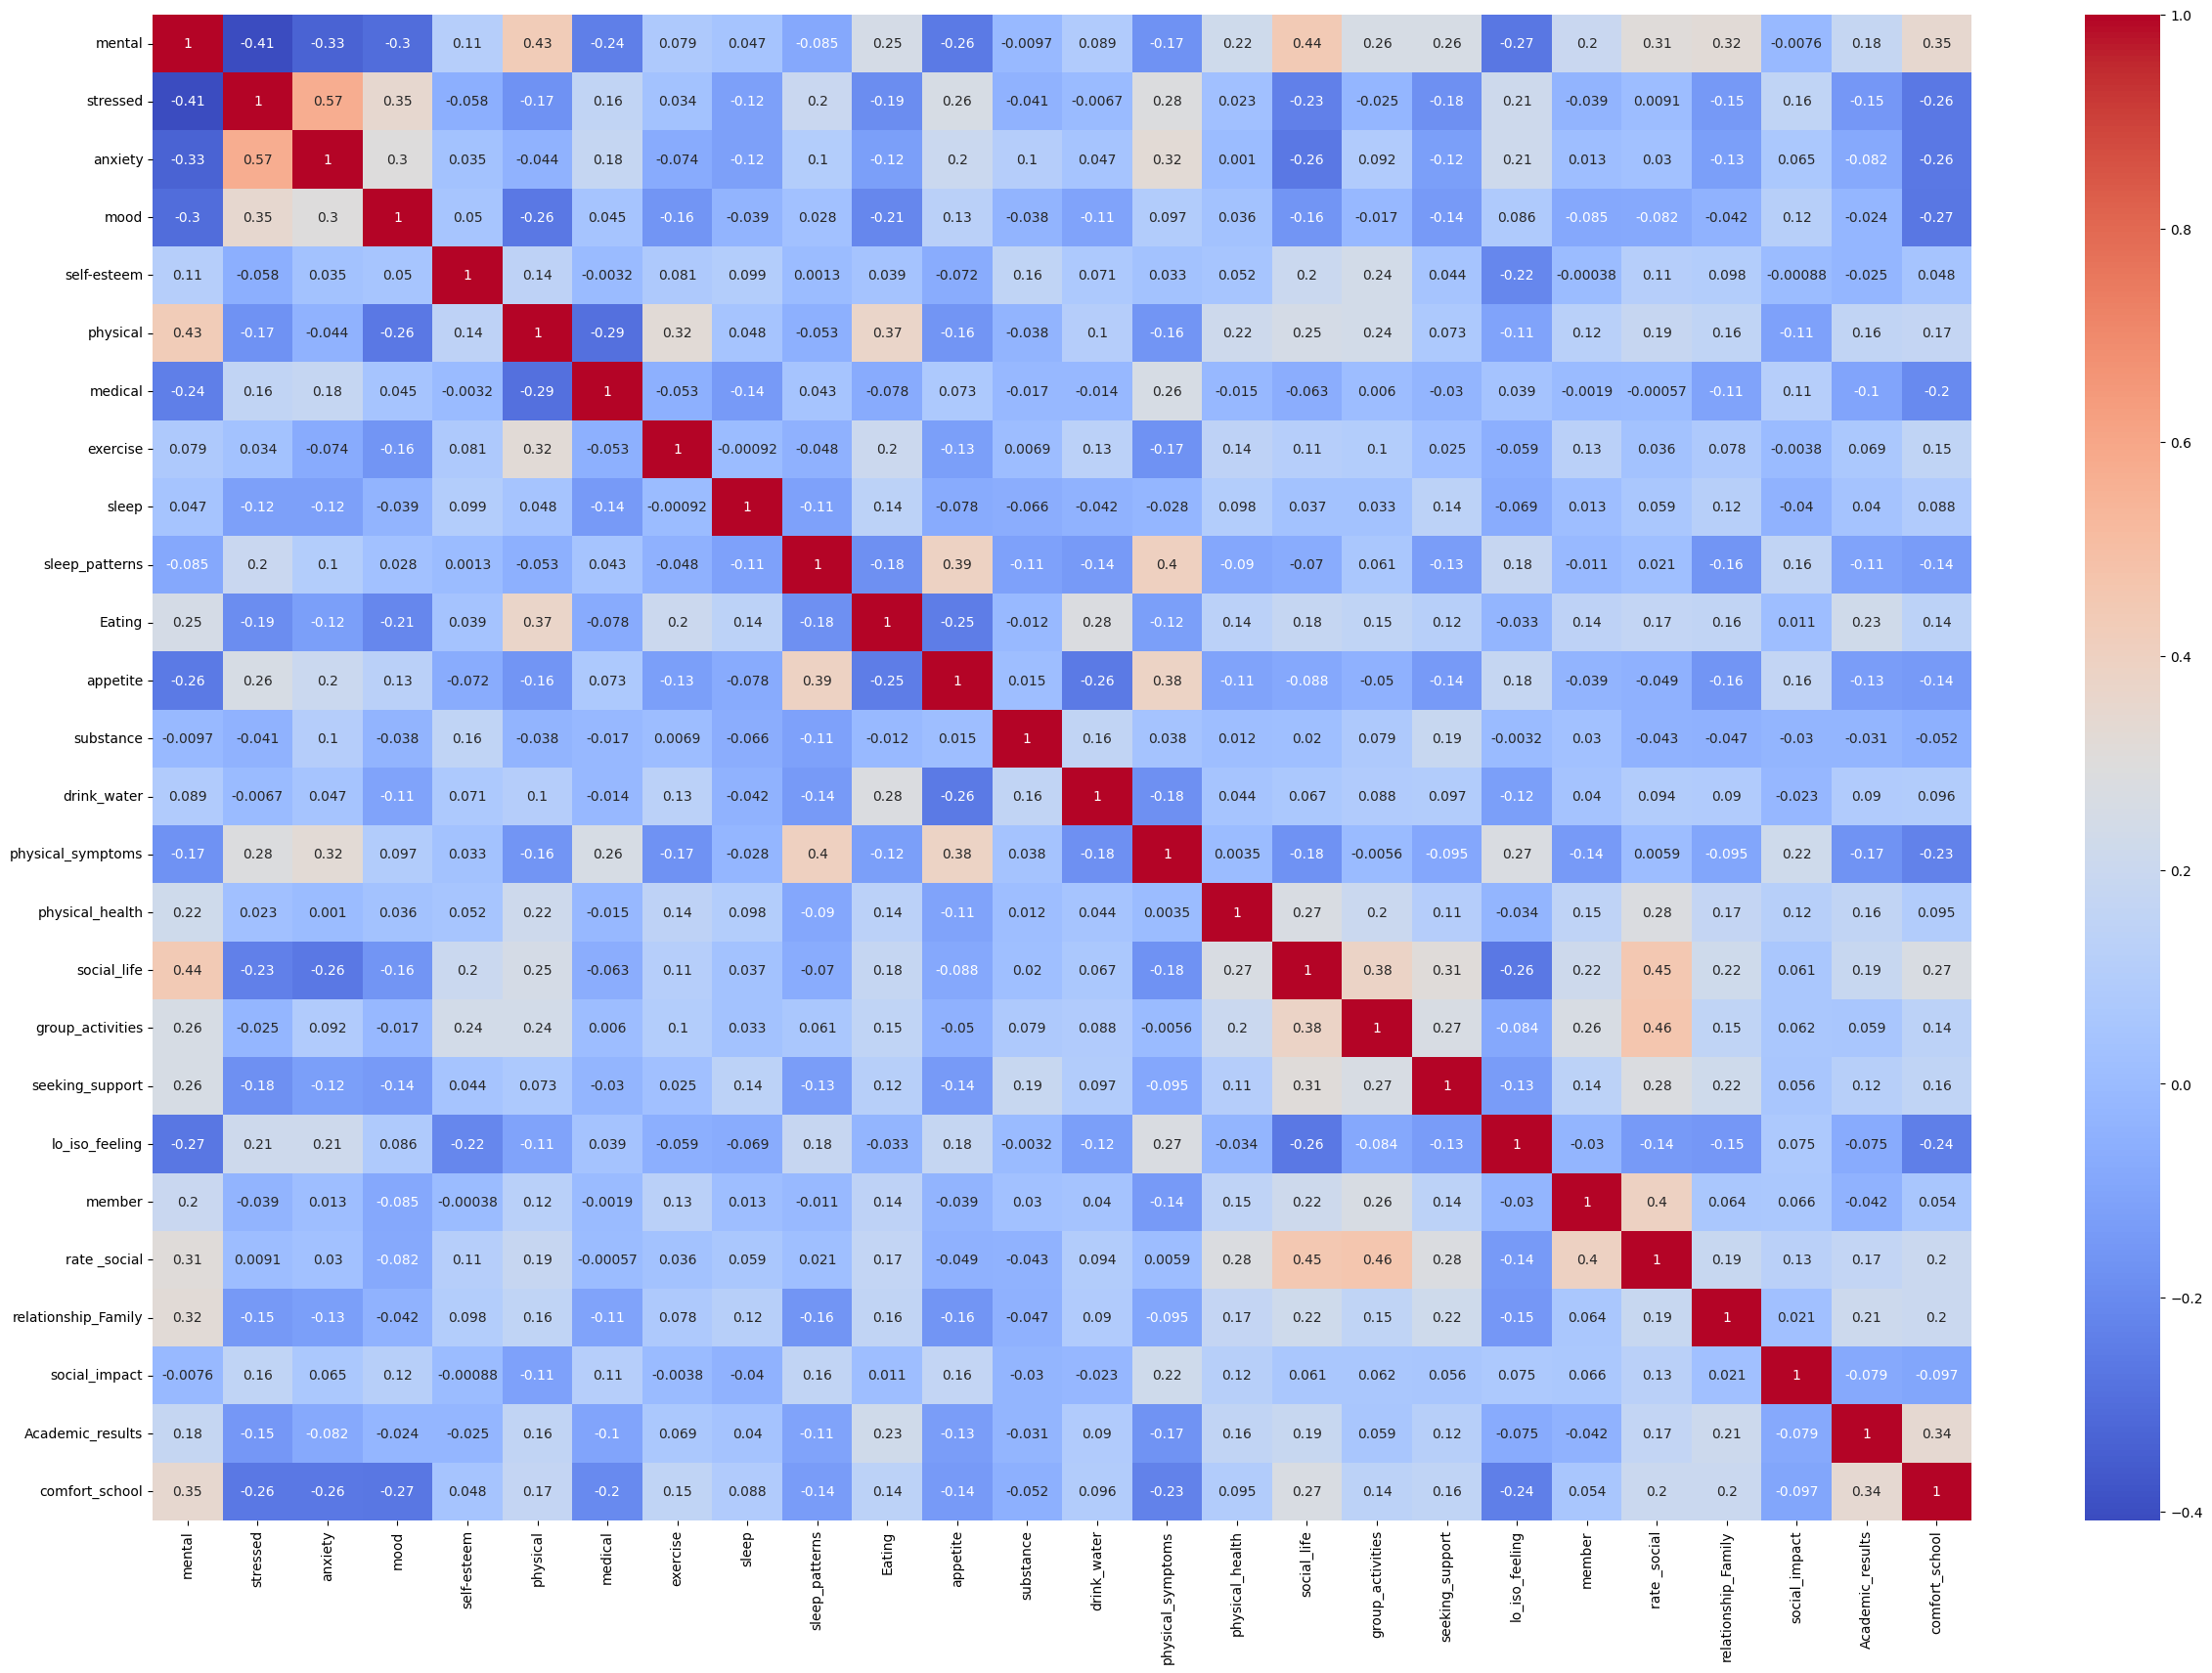

In [14]:
correlation_matrix = data.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In our correlation matrix analysis, we found that academic results are most correlated with school comfort, family relationships, social life, eating habits, mental and physical health, and stress. While the expected strong correlation with mood did not materialize, this could be due to the limited dataset size.
Notably, the correlation between social life and academic results could be explained by a higher representation of individuals with a preparatory background in the dataset. These individuals often face challenges in social life, potentially impacting academic performance.
our findings underscore the need for a nuanced interpretation, considering both the observed patterns and the dataset's limitations.

## Mental Well-being Rating

**How would you rate your overall mental well-being?**

**Objective**:
Explore the distribution of self-reported mental well-being ratings to gain insights into the overall mental health of the respondents.

**Assumption**:
Given that the data is collected through a school form, there might be a tendency for respondents to provide socially desirable responses, potentially skewing the distribution towards higher ratings.

In [ ]:
# Mental Well-being Rating
fig = px.histogram(data, x="mental", title="Mental Well-being Distribution")
fig.show()

**Interpretation**:
The histogram shows a distribution of mental well-being ratings. The distribution appears more balanced, with a slight skew towards higher ratings. This suggests that, on average, respondents report positive mental well-being. However, we still have some respondents who reported lower mental health ratings

# Mental vs. School results
**Objective:**
Examine the relationship between self-reported mental well-being and academic results to understand if there's a discernible correlation.
**Objective:**
Examine the relationship between self-reported mental well-being and academic results to understand if there's a discernible correlation.

In [37]:
# School results vs. Mental Well-being
fig = px.box(data, x="mental", y="Academic_results", title="School results vs. Mental Well-being")
fig.show()

**Interpretation:**
 * The analysis reveals a noteworthy trend in the relationship between mental
well-being and academic results. Individuals reporting lower mental well-being ratings tend to cluster in the below-average range of academic results, indicating a potential association between poorer mental health and academic performance.
 * However, Participants may be less inclined to disclose their true mental state, especially if it's negative, potentially leading to an underrepresentation of lower mental well-being in the dataset.

 * Further exploration, potentially through qualitative research or targeted interventions, may provide deeper insights into this intricate relationship (Conducting qualitative research involves gathering in-depth insights through methods such as interviews, focus groups, or open-ended surveys/Monitoring the impact  applying specific programs or support mechanisms aimed at improving mental well-being and, consequently, academic outcomes can provide valuable insights into causation and the effectiveness of various strategies.).



## Stress Frequency

**How often do you feel stressed on a typical week?**

**Objective**:
We will Investigate the frequency of stress experienced by respondents on a typical week, to provide insights into their stress patterns.

**Assumption**:
In universities, it is more common to see students more stressed than the usual, so we might see a slight skewing of the distribution towards higher ratings.

In [27]:
fig = px.pie(data, names='stressed', title='Stress Frequency')
fig.show()

**Interpretation**:
However, The histogram illustrates a diverse distribution of stress frequencies. Contrary to the assumption, there is a notable proportion reporting frequent stress and others not so frequent.

# Stress vs. Academic results
**Objective:** we aim to identify patterns or correlations that may suggest a link between stress levels and academic performance.

**Assumption:**
The assumption is that higher stress levels might negatively impact academic results. The stress experienced by students, whether related to academic pressures or external factors, could potentially influence their ability to focus, study effectively, and perform well in exams.

In [38]:
# Academic results vs. Stress
fig = px.box(data, x="stressed", y="Academic_results", title="Stress vs. Academic results")
fig.show()

**Interpretation:**
* The analysis demonstrates a noticeable trend where individuals reporting higher levels of stress tend to cluster in the lower academic result categories. This suggests a potential negative correlation between stress frequency and academic performance.
* The analysis reveals a distinct trend, indicating that individuals reporting higher levels of stress tend to cluster in the lower academic result categories. This observation suggests a potential negative correlation between stress frequency and academic performance. Notably, the distribution of stress and academic results  emphasize a commonality in the academic outcomes among participants, regardless of stress feeling.
* the near-normalized distribution prompts further exploration into individual coping mechanisms, external influences, or additional factors that may contribute to the observed patterns.

## Stress vs. Mental Well-being


**Objective**:
We Explore the relationship between stress levels and self-reported mental well-being, investigating potential correlations.

**Assumption**:
Higher stress levels may correlate with lower self-reported mental well-being.

In [ ]:
# Stress vs. Mental Well-being
fig = px.box(data, x="stressed", y="mental", title="Stress vs. Mental Well-being")
fig.show()

**Interpretation**:
After inspecting the IQR range of each box plot, we could confirm our assumption, indicating a negative correlation between stress frequency and mental well-being. Respondents reporting higher stress levels tend to rate their mental well-being lower, emphasizing the impact of stress on overall mental health.

# Anxiety (Potential important feature)
**How frequent have you experienced feelings of excessive worry or anxiety in the past month?**

**Objective**:gain insights into the prevalence of these emotional states within the surveyed population, providing a perspective on the overall mental well-being related to anxiety.

**Assumption:**
Responses to this question are expected to unveil the extent to which excessive worry or anxiety is prevalent among respondents. The assumption is that these feelings may contribute to the overall mental well-being of the surveyed population.

In [28]:
fig = ff.create_distplot([data['anxiety'].dropna()], group_labels=['Anxiety'], bin_size=1, show_rug=False)
fig.update_layout(title='Distribution of Anxiety')
fig.show()

**Interpretation:**
This indicates that a significant portion of the surveyed population reports low to moderate levels of anxiety.
Lower ratings indicate that a significant portion of the population may not frequently encounter excessive worry, contributing to a positive mental well-being outlook.

# Anxiety vs. Academic results
**Objective:** The analysis aims to identify patterns or correlations that may suggest a connection between anxiety levels and academic performance.

**Assumption:** The assumption is that higher levels of anxiety may have a negative impact on academic results. Anxiety can affect concentration, cognitive function, and overall academic performance. Therefore, individuals experiencing frequent anxiety might face challenges in achieving higher academic outcomes.

In [39]:
# Anxiety vs. Academic results
fig = px.box(data, x="anxiety", y="Academic_results", title="Anxiety vs. Academic results")
fig.show()

**Interpretation:**
* The box plot indicates that there is no strong correlation between anxiety levels and academic results, as the medians and quartiles are relatively consistent across different anxiety categories. However, a closer inspection of the data reveals an interesting pattern: within the range of anxiety rates from 0 to 3, the academic results tend to concentrate around the average.
* This concentration suggests that while there may not be a linear correlation, there could be a nuanced relationship between mild to moderate anxiety levels and academic performance.
* This nuanced observation emphasizes the importance of considering not only the presence or absence of correlation but also the specific ranges or categories within which potential associations may exist. Further investigation and subgroup analysis within these ranges could provide deeper insights into the complex dynamics between anxiety and academic results.

# Stress vs. Anxiety

**Objective:**he goal is to understand the relationship between these two aspects of mental well-being and identify potential patterns or associations.

**Assumption:**
We anticipate a positive correlation between the feeling of stress and the frequency of excessive worry or anxiety.

In [24]:
# Stress vs. Anxiety
fig = px.box(data, x="stressed", y="anxiety", title="Stress vs. Anxiety")
fig.show()

**Interpretations:** A positive correlation suggests that as feelings of stress increase, the frequency of experiencing excessive worry or anxiety also tends to increase. This pattern would align with the expectation that heightened stress levels contribute to elevated anxiety.

# Low mood frequency (Potential important feature)
 **Over the past month, how frequent have you experienced a persistent low mood or a lack of interest in activities you usually enjoy?**

**Objective:** The goal is to gain insights into the prevalence of these emotional states among respondents, providing a snapshot of their mental well-being

**Assumption:**
Responses to this question may reveal the extent to which persistent low mood and reduced interest in enjoyable activities are prevalent within the surveyed population. The assumption is that these experiences may impact overall mental well-being.

In [22]:
# Mood
fig = px.histogram(data, x="mood", title="Low mood frequency")
fig.show()

**Interpretation:**
The histogram appears to have a positive skewness, indicating that a majority of respondents may have experienced these emotional states infrequently . This suggests a generally positive mental well-being trend within the surveyed population.
While the bulk of responses cluster towards lower frequencies, exploring the tail of the distribution is crucial. Instances of higher frequencies may represent a subset of respondents facing more significant mental well-being challenges

# Low mood frequency vs. Academic results
**Objective:** we aims to identify any discernible patterns or correlations that may suggest a connection between the frequency of low moods and academic performance.

**Assumption:** The assumption is that a higher frequency of persistent low moods may have a negative impact on academic results. Persistent low moods can affect motivation, engagement, and overall cognitive function, potentially influencing academic performance adversely.


In [40]:
# Low mood frequency vs. Academic results
fig = px.box(data, x="mood", y="Academic_results", title="Low mood frequency vs. Academic results")
fig.show()

**Interpretation:**
* While a higher frequency of low moods could potentially be associated with lower academic performance for some individuals, others with similar low mood frequencies may still achieve average or above-average academic results.
* The absence of a clear and uniform trend underscores the need for a more nuanced understanding of the factors influencing this association.
* It's crucial to explore individual differences, coping mechanisms, and contextual factors that may moderate the impact of low mood frequency on academic outcomes.

# Eating Habits
**How would you describe your eating habits?**

**Objective**: we explore the descriptions provided by respondents regarding their eating habits to gain insights into the diverse dietary practices within the surveyed population.

**Assumption**:  Individuals may have varied perspectives on what constitutes "healthy" eating habits, the analysis should consider subjective interpretations and potential social desirability bias.


In [31]:
# Eating Habits
fig = px.histogram(data, x="Eating", title="Eating Habit")
fig.show()


**Interpretation:** The histogram reveals a central concentration of responses when describing eating habits, indicating a tendency toward the average. This likely results from the subjective and ambiguous nature of defining "healthy" eating, with individuals possibly opting for a middle ground due to uncertainty or a desire to conform to societal norms. This emphasizes the inherent subjectivity in evaluating dietary practices.

**This is why this feature maybe not as important as its shown in the correlation matrix to analyse the school result .**

## Exercise Frequency

**How many times do you exercise with moderate to high intensity in a week?**

**Objective**:
Now we want understand the distribution of exercise frequencies, providing insights into the physical activity levels of respondents.

**Assumption**:
Since the responses are coming from university students, so the assumption here is we we might see a slight skewing of the distribution towards lower values.

In [32]:
# Exercise Frequency
fig = px.pie(data, names='exercise', title='Exercise Frequency')
fig.show()

**Interpretation**:
We could confirm our assumption since there is a notable portion reporting low exercise frequency.

#Physical vs. Exercise Frequency
**How would you rate your overall physical health?**

**How many times do you exercise with moderate to high intensity in a week?**

**Objective:** We want understand how individuals perceive their physical health and whether there is an association with their exercise habits.

**Assumption:**
We anticipate a positive correlation, expecting that individuals who rate their overall physical health higher may also engage in more frequent moderate to high-intensity exercise.

In [36]:
# Physical vs. Exercise Frequency
fig = px.box(data, x="physical", y="exercise", title="Physical vs. Exercise Frequency")
fig.show()

**Interpretations:**
Limited correlation suggests that exercise frequency may not strongly influence how individuals rate their physical health.
Other factors may play a more significant role in overall health perception (potentially other lifestyle aspects.).

# Mental vs. Physical Rate
**Objective:**we want to understand the relationship between these two dimensions of well-being and identify potential connections that contribute to a comprehensive view of respondents' health.

**Assumption:**
We anticipate a positive correlation between overall mental well-being and overall physical health. The assumption is that individuals with higher mental well-being ratings are likely to report better overall physical health.

In [26]:
# Mental vs. Physical rate
fig = px.box(data, x="mental", y="physical", title="Mental vs. Physical")
fig.show()

**Interpretations:** A weaker positive correlation implies a less consistent relationship between mental well-being and physical health. In this scenario, other factors may contribute more significantly to variations in overall health.

# Rating Physical Health Contribution
**How would you rate the contribution of your physical health to your overall well-being?**

**Objective:** Explore respondents' ratings of the contribution of their physical health to overall well-being to gain insights into the perceived significance of physical well-being in their lives.

**Assumption:**
Respondents might exhibit a tendency to provide higher rating responses,this trend aligns with the widely acknowledged connection between physical and mental well-being.



In [34]:
# Rating Physical Health Contribution
fig = ff.create_distplot([data['physical_health'].dropna()], group_labels=['physical_health'], bin_size=1, show_rug=False)
fig.update_layout(title='Physical health contribution in well-being')
fig.show()

**Interpretation:**
The histogram confirm our assumption displaying a notable concentration of responses towards higher ratings,this indicates a positive perception of the contribution of physical health to overall well-being.

**the analysis provides a deeper understanding of how respondents perceive the role of physical health in their overall well-being. While not directly indicative of academic performance.**

# Family Relationship
**How would you describe your relationship with your family members?**

**Objective:**
We examine the distribution of responses to the question regarding how respondents describe their relationship with family members. The goal is to gain insights into the diversity of family dynamics and understand how individuals perceive their connections within the family unit.

**Assumption:**
Responses to this question are likely influenced by individual experiences, cultural factors, and personal perspectives.Responses will potentially reveals a diverse range of descriptors chosen by respondents

In [19]:
# Family Relationship
fig = px.histogram(data, x="relationship_Family", title="Family Relationship")
fig.show()

**Interpretation:**
The distribution indicates the prevalence of positive family dynamics among respondents, shedding light on the importance they attribute to familial connections.

# School Comfort
**How much do you feel comfortable in your school?**

**Objective:**
Analyze the distribution of responses to the question assessing the comfort level of respondents within the school environment. The objective is to understand how individuals perceive their comfort in the school setting, which can contribute to insights on the overall school experience.

**Assumption:**
Considering the Tunisian background, there may be a tendency for respondents to report a lower comfort level due to overall negative experiences with the school system, atmosphere, and learning environment. This assumption aligns with potential cultural and systemic challenges within the educational context.

In [20]:
# School Comfort
fig = px.histogram(data, x="comfort_school", title="School Comfort")
fig.show()

**Interpretation:** Contrary to our initial assumption, the histogram displays a positive skewness in the distribution of comfort levels within the school environment. This unexpected pattern suggests that a majority of participants may have developed resilience and adapted to the existing conditions.

 **This unexpected pattern underscores the importance of considering cultural nuances and individual experiences within the analysis of school well-being as adding (sexe,language,city,school level..) in the survey .**

# Interpretation and Implications:

**Interpretation**

our analysis reveals a multifaceted landscape of factors influencing student well-being, categorized into mental health, physical health, and social life aspects. The frequency of mental health challenges, exercise routines, dietary habits, and social dynamics emerged as pivotal elements affecting students' overall well-being. Additionally, social interactions, school comfort, and engagement in extracurricular activities were identified as crucial components in understanding the holistic picture of student life.

**Implications:**

Understanding these intricate interactions among well-being aspects is vital for devising targeted interventions to support students in both academic endeavors and personal development. The identified correlations highlight the interconnectedness of mental, physical, and social factors, emphasizing the need for holistic well-being programs in educational institutions.

# Recommendations:

**Dataset Enlargement:**

Consider expanding the dataset to include additional features, such as cultural and regional factors, to provide a more nuanced understanding of participants' lives.

**Balancing Survey Length:**

While enriching the dataset is valuable, carefully balance the survey length to maintain participant engagement. Long surveys may lead to reduced motivation to contribute.

**Targeted Interventions:**

Based on our findings, implement targeted interventions that address specific well-being challenges, promoting a comprehensive approach to student support.

**Cultural Sensitivity:**

When incorporating cultural and regional factors, ensure sensitivity to diverse backgrounds and experiences, fostering inclusivity in survey design.

**TO DO**:
 - Add Preprocessing
 - Add Correlation at the top so we will limit our analysis between the most 5 Correlated features with the target and the highest feature-feature correlation.
 * Group of top 5 correlated with target
  - Analyisis mt3 each feature -> histogram / distplot / pie chart (Alternate)
  - Analysis mt3 each feature with target (Scatter / Box Plot)
 * Group of feature-feature correlation
  - ANalysisi mt3 each feature
  - Analysis mt3 corr feature - feature
  - Analysis mt3 each group possibly (violin plot)